## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9482355	total: 58.7ms	remaining: 58.6s
1:	learn: 0.9284889	total: 59.6ms	remaining: 29.8s
2:	learn: 0.9090601	total: 60.7ms	remaining: 20.2s
3:	learn: 0.8922136	total: 61.8ms	remaining: 15.4s
4:	learn: 0.8756165	total: 62.7ms	remaining: 12.5s
5:	learn: 0.8617473	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8449889	total: 64.6ms	remaining: 9.16s
7:	learn: 0.8287862	total: 65.5ms	remaining: 8.12s
8:	learn: 0.8145277	total: 66.4ms	remaining: 7.31s
9:	learn: 0.7999202	total: 67.3ms	remaining: 6.66s
10:	learn: 0.7858309	total: 68.1ms	remaining: 6.12s
11:	learn: 0.7709537	total: 69.1ms	remaining: 5.69s
12:	learn: 0.7564928	total: 70.2ms	remaining: 5.33s
13:	learn: 0.7415282	total: 71.1ms	remaining: 5.01s
14:	learn: 0.7293580	total: 72ms	remaining: 4.73s
15:	learn: 0.7161058	total: 72.8ms	remaining: 4.48s
16:	learn: 0.7043261	total: 73.7ms	remaining: 4.26s
17:	learn: 0.6922261	total: 74.5ms	remaining: 4.06s
18:	learn: 0.6798973	total: 75.3ms	remaining: 

42:	learn: 0.4796559	total: 99ms	remaining: 2.2s
43:	learn: 0.4743700	total: 100ms	remaining: 2.17s
44:	learn: 0.4691288	total: 101ms	remaining: 2.15s
45:	learn: 0.4635465	total: 102ms	remaining: 2.12s
46:	learn: 0.4571133	total: 103ms	remaining: 2.09s
47:	learn: 0.4515556	total: 104ms	remaining: 2.06s
48:	learn: 0.4462024	total: 105ms	remaining: 2.04s
49:	learn: 0.4416059	total: 106ms	remaining: 2.01s
50:	learn: 0.4362121	total: 107ms	remaining: 1.99s
51:	learn: 0.4316211	total: 108ms	remaining: 1.96s
52:	learn: 0.4273095	total: 109ms	remaining: 1.94s
53:	learn: 0.4240923	total: 109ms	remaining: 1.91s
54:	learn: 0.4200122	total: 110ms	remaining: 1.89s
55:	learn: 0.4163776	total: 111ms	remaining: 1.87s
56:	learn: 0.4130174	total: 112ms	remaining: 1.85s
57:	learn: 0.4087881	total: 112ms	remaining: 1.83s
58:	learn: 0.4053687	total: 113ms	remaining: 1.81s
59:	learn: 0.4014540	total: 114ms	remaining: 1.79s
60:	learn: 0.3978596	total: 115ms	remaining: 1.77s
61:	learn: 0.3942052	total: 116ms

148:	learn: 0.2491792	total: 191ms	remaining: 1.09s
149:	learn: 0.2485405	total: 192ms	remaining: 1.09s
150:	learn: 0.2473485	total: 193ms	remaining: 1.08s
151:	learn: 0.2467528	total: 194ms	remaining: 1.08s
152:	learn: 0.2461459	total: 195ms	remaining: 1.08s
153:	learn: 0.2453466	total: 196ms	remaining: 1.07s
154:	learn: 0.2445231	total: 197ms	remaining: 1.07s
155:	learn: 0.2435977	total: 198ms	remaining: 1.07s
156:	learn: 0.2429728	total: 199ms	remaining: 1.07s
157:	learn: 0.2418436	total: 200ms	remaining: 1.06s
158:	learn: 0.2409848	total: 201ms	remaining: 1.06s
159:	learn: 0.2405827	total: 201ms	remaining: 1.06s
160:	learn: 0.2395354	total: 202ms	remaining: 1.05s
161:	learn: 0.2387978	total: 203ms	remaining: 1.05s
162:	learn: 0.2384202	total: 204ms	remaining: 1.05s
163:	learn: 0.2377702	total: 205ms	remaining: 1.04s
164:	learn: 0.2370137	total: 206ms	remaining: 1.04s
165:	learn: 0.2361956	total: 207ms	remaining: 1.04s
166:	learn: 0.2356713	total: 208ms	remaining: 1.03s
167:	learn: 

261:	learn: 0.1866875	total: 289ms	remaining: 814ms
262:	learn: 0.1862171	total: 290ms	remaining: 812ms
263:	learn: 0.1859524	total: 291ms	remaining: 811ms
264:	learn: 0.1853593	total: 292ms	remaining: 809ms
265:	learn: 0.1852062	total: 292ms	remaining: 807ms
266:	learn: 0.1847348	total: 293ms	remaining: 805ms
267:	learn: 0.1842619	total: 294ms	remaining: 804ms
268:	learn: 0.1840385	total: 295ms	remaining: 802ms
269:	learn: 0.1835272	total: 296ms	remaining: 801ms
270:	learn: 0.1833916	total: 297ms	remaining: 799ms
271:	learn: 0.1832300	total: 298ms	remaining: 797ms
272:	learn: 0.1828353	total: 299ms	remaining: 795ms
273:	learn: 0.1825779	total: 300ms	remaining: 794ms
274:	learn: 0.1822056	total: 301ms	remaining: 793ms
275:	learn: 0.1818376	total: 301ms	remaining: 791ms
276:	learn: 0.1814744	total: 302ms	remaining: 789ms
277:	learn: 0.1810702	total: 303ms	remaining: 787ms
278:	learn: 0.1808335	total: 304ms	remaining: 785ms
279:	learn: 0.1806478	total: 305ms	remaining: 784ms
280:	learn: 

370:	learn: 0.1563640	total: 382ms	remaining: 648ms
371:	learn: 0.1561989	total: 383ms	remaining: 647ms
372:	learn: 0.1558000	total: 384ms	remaining: 645ms
373:	learn: 0.1554994	total: 385ms	remaining: 644ms
374:	learn: 0.1551120	total: 386ms	remaining: 643ms
375:	learn: 0.1547729	total: 386ms	remaining: 641ms
376:	learn: 0.1545385	total: 387ms	remaining: 640ms
377:	learn: 0.1539671	total: 388ms	remaining: 639ms
378:	learn: 0.1538084	total: 389ms	remaining: 637ms
379:	learn: 0.1534477	total: 390ms	remaining: 636ms
380:	learn: 0.1532003	total: 391ms	remaining: 635ms
381:	learn: 0.1531760	total: 392ms	remaining: 634ms
382:	learn: 0.1531428	total: 392ms	remaining: 632ms
383:	learn: 0.1530171	total: 393ms	remaining: 631ms
384:	learn: 0.1527691	total: 394ms	remaining: 629ms
385:	learn: 0.1527402	total: 395ms	remaining: 628ms
386:	learn: 0.1526969	total: 395ms	remaining: 626ms
387:	learn: 0.1522884	total: 396ms	remaining: 625ms
388:	learn: 0.1520890	total: 397ms	remaining: 624ms
389:	learn: 

487:	learn: 0.1286437	total: 480ms	remaining: 503ms
488:	learn: 0.1283955	total: 480ms	remaining: 502ms
489:	learn: 0.1281123	total: 481ms	remaining: 501ms
490:	learn: 0.1277749	total: 482ms	remaining: 500ms
491:	learn: 0.1275672	total: 483ms	remaining: 499ms
492:	learn: 0.1275286	total: 484ms	remaining: 498ms
493:	learn: 0.1274259	total: 485ms	remaining: 496ms
494:	learn: 0.1271838	total: 485ms	remaining: 495ms
495:	learn: 0.1268205	total: 486ms	remaining: 494ms
496:	learn: 0.1266538	total: 487ms	remaining: 493ms
497:	learn: 0.1265695	total: 488ms	remaining: 492ms
498:	learn: 0.1264192	total: 489ms	remaining: 491ms
499:	learn: 0.1261969	total: 489ms	remaining: 489ms
500:	learn: 0.1258697	total: 490ms	remaining: 488ms
501:	learn: 0.1255883	total: 491ms	remaining: 487ms
502:	learn: 0.1254133	total: 492ms	remaining: 486ms
503:	learn: 0.1250626	total: 493ms	remaining: 485ms
504:	learn: 0.1247977	total: 494ms	remaining: 484ms
505:	learn: 0.1246393	total: 495ms	remaining: 483ms
506:	learn: 

599:	learn: 0.1081916	total: 572ms	remaining: 381ms
600:	learn: 0.1080133	total: 573ms	remaining: 381ms
601:	learn: 0.1078903	total: 574ms	remaining: 380ms
602:	learn: 0.1077437	total: 575ms	remaining: 379ms
603:	learn: 0.1074977	total: 576ms	remaining: 378ms
604:	learn: 0.1073084	total: 577ms	remaining: 377ms
605:	learn: 0.1070789	total: 578ms	remaining: 376ms
606:	learn: 0.1069374	total: 579ms	remaining: 375ms
607:	learn: 0.1069002	total: 580ms	remaining: 374ms
608:	learn: 0.1065362	total: 580ms	remaining: 373ms
609:	learn: 0.1063782	total: 581ms	remaining: 372ms
610:	learn: 0.1062003	total: 582ms	remaining: 371ms
611:	learn: 0.1059879	total: 583ms	remaining: 370ms
612:	learn: 0.1057840	total: 584ms	remaining: 368ms
613:	learn: 0.1057369	total: 584ms	remaining: 367ms
614:	learn: 0.1055673	total: 585ms	remaining: 366ms
615:	learn: 0.1053668	total: 586ms	remaining: 365ms
616:	learn: 0.1051685	total: 587ms	remaining: 364ms
617:	learn: 0.1050570	total: 588ms	remaining: 363ms
618:	learn: 

715:	learn: 0.0908035	total: 670ms	remaining: 266ms
716:	learn: 0.0906804	total: 671ms	remaining: 265ms
717:	learn: 0.0905083	total: 672ms	remaining: 264ms
718:	learn: 0.0903841	total: 673ms	remaining: 263ms
719:	learn: 0.0902598	total: 674ms	remaining: 262ms
720:	learn: 0.0900891	total: 674ms	remaining: 261ms
721:	learn: 0.0899516	total: 675ms	remaining: 260ms
722:	learn: 0.0899076	total: 676ms	remaining: 259ms
723:	learn: 0.0898160	total: 677ms	remaining: 258ms
724:	learn: 0.0896772	total: 678ms	remaining: 257ms
725:	learn: 0.0895702	total: 679ms	remaining: 256ms
726:	learn: 0.0894944	total: 680ms	remaining: 255ms
727:	learn: 0.0893521	total: 681ms	remaining: 254ms
728:	learn: 0.0892166	total: 682ms	remaining: 253ms
729:	learn: 0.0890710	total: 683ms	remaining: 252ms
730:	learn: 0.0889549	total: 683ms	remaining: 251ms
731:	learn: 0.0887670	total: 684ms	remaining: 250ms
732:	learn: 0.0886468	total: 685ms	remaining: 249ms
733:	learn: 0.0886172	total: 686ms	remaining: 248ms
734:	learn: 

824:	learn: 0.0771239	total: 763ms	remaining: 162ms
825:	learn: 0.0768806	total: 764ms	remaining: 161ms
826:	learn: 0.0767782	total: 764ms	remaining: 160ms
827:	learn: 0.0765957	total: 765ms	remaining: 159ms
828:	learn: 0.0764431	total: 766ms	remaining: 158ms
829:	learn: 0.0763252	total: 767ms	remaining: 157ms
830:	learn: 0.0761707	total: 768ms	remaining: 156ms
831:	learn: 0.0760759	total: 769ms	remaining: 155ms
832:	learn: 0.0758438	total: 769ms	remaining: 154ms
833:	learn: 0.0757082	total: 771ms	remaining: 153ms
834:	learn: 0.0756364	total: 771ms	remaining: 152ms
835:	learn: 0.0754587	total: 772ms	remaining: 151ms
836:	learn: 0.0752883	total: 773ms	remaining: 151ms
837:	learn: 0.0751687	total: 774ms	remaining: 150ms
838:	learn: 0.0750379	total: 775ms	remaining: 149ms
839:	learn: 0.0748875	total: 775ms	remaining: 148ms
840:	learn: 0.0748016	total: 776ms	remaining: 147ms
841:	learn: 0.0747134	total: 777ms	remaining: 146ms
842:	learn: 0.0746121	total: 778ms	remaining: 145ms
843:	learn: 

938:	learn: 0.0645431	total: 861ms	remaining: 55.9ms
939:	learn: 0.0644605	total: 862ms	remaining: 55ms
940:	learn: 0.0643738	total: 863ms	remaining: 54.1ms
941:	learn: 0.0642148	total: 864ms	remaining: 53.2ms
942:	learn: 0.0641121	total: 865ms	remaining: 52.3ms
943:	learn: 0.0640231	total: 866ms	remaining: 51.3ms
944:	learn: 0.0639960	total: 866ms	remaining: 50.4ms
945:	learn: 0.0638788	total: 867ms	remaining: 49.5ms
946:	learn: 0.0637397	total: 869ms	remaining: 48.6ms
947:	learn: 0.0636447	total: 869ms	remaining: 47.7ms
948:	learn: 0.0635824	total: 870ms	remaining: 46.8ms
949:	learn: 0.0635631	total: 871ms	remaining: 45.8ms
950:	learn: 0.0634567	total: 872ms	remaining: 44.9ms
951:	learn: 0.0633502	total: 873ms	remaining: 44ms
952:	learn: 0.0632172	total: 873ms	remaining: 43.1ms
953:	learn: 0.0631176	total: 874ms	remaining: 42.2ms
954:	learn: 0.0630371	total: 875ms	remaining: 41.2ms
955:	learn: 0.0629417	total: 876ms	remaining: 40.3ms
956:	learn: 0.0628588	total: 877ms	remaining: 39.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

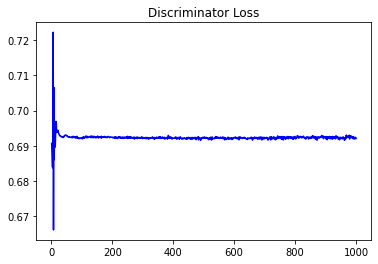

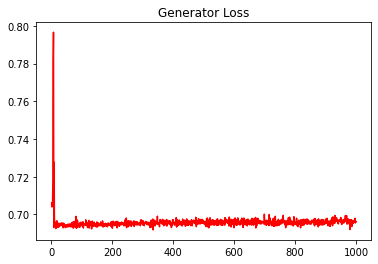

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.36420230948607046


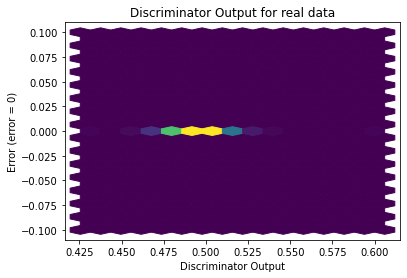

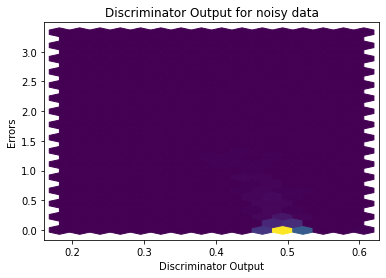

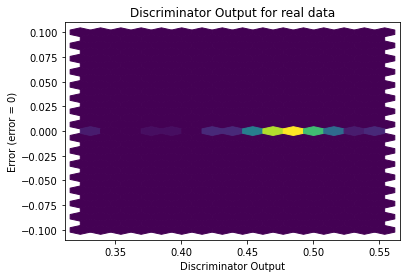

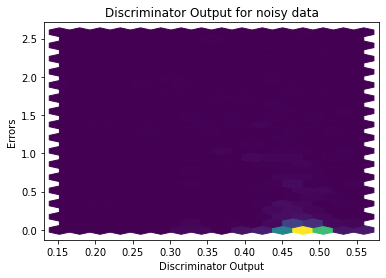

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


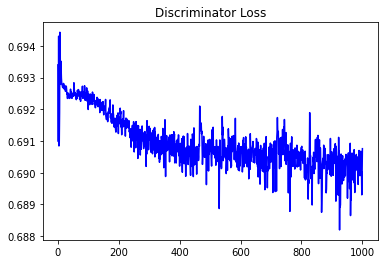

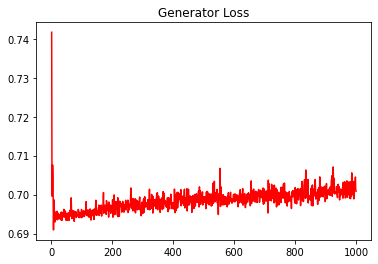

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20821121461122888


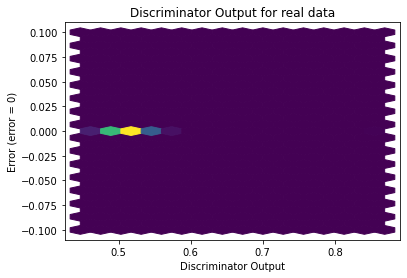

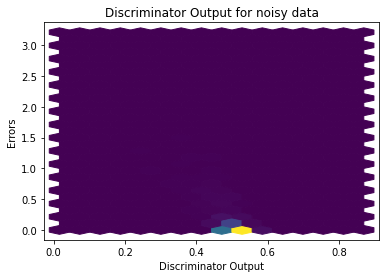

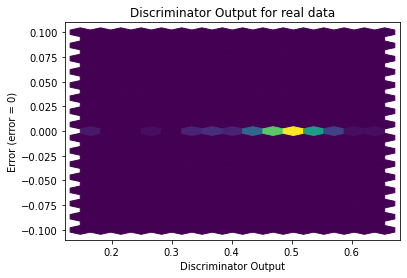

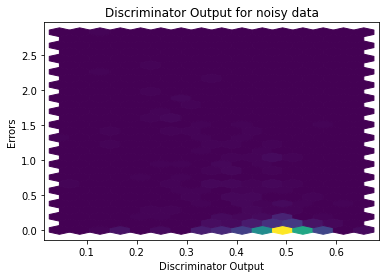

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9874]], requires_grad=True)
